# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']
print (X.shape)

(4078, 2)


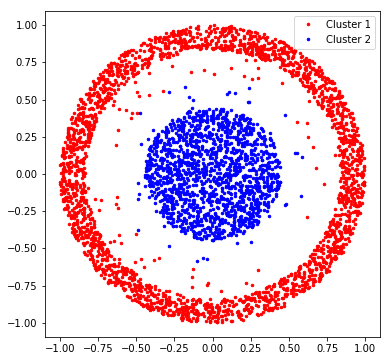

In [78]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 50
threshold = 0.5

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph
W = knn_graph(X, k_in_knn_graph, threshold)

# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)
cluster_plot(X, idx)

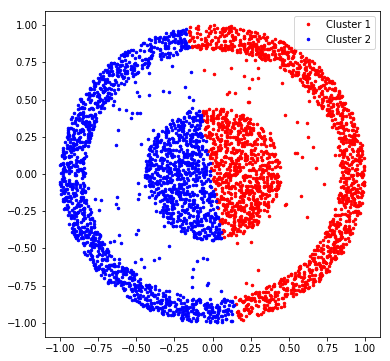

In [4]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [27]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)
fea = np.array(fea.todense())

In [33]:
print (fea.shape, gnd.shape)
print (type(fea), fea.shape)
print (set(gnd))
print (constructW.__doc__)
print ()
print (bestMap.__doc__)
print ()
print (MutualInfo.__doc__)

(1319, 14964) (1319,)
<class 'numpy.ndarray'> (1319, 14964)
{4, 9, 13, 21, 26}

        Usage:
        W = constructW(fea, options)

        fea: Rows of vectors of data points. Each row is x_i
        options: Struct value in Matlab. The fields in options that can be set:

                NeighborMode -  Indicates how to construct the graph. Choices
                                are: [Default 'KNN']
                    'KNN'             -  k = 0
                                            Complete graph
                                         k > 0
                                           Put an edge between two nodes if and
                                           only if they are among the k nearst
                                           neighbors of each other. You are
                                           required to provide the parameter k in
                                           the options. Default k=5.
                    'Supervised'      -  k = 0
        

In [80]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo


# YOUR CODE HERE
# begin answer
K = len(set(gnd))
testCase = 100
kmean_acc, kmean_nmi = 0, 0
spectral_binary_acc, spectral_binary_nmi = 0, 0
spectral_kernel_acc, spectral_kernel_nmi = 0, 0

for t in range(testCase):
    #print ("Step", t, "Start!")
    kmean_ans = bestMap(gnd, kmeans(fea, K))
    kmean_acc += np.sum(kmean_ans == gnd) / gnd.shape[0]
    kmean_nmi += MutualInfo(gnd, kmean_ans)
    options = {'NeighborMode': 'KNN'}
    options['k'] = 5
    options['WeightMode'] = 'HeatKernel'
    
    W = np.array(constructW(fea, **options).todense())
    spectral_binary_ans = bestMap(gnd, spectral(W, K))
    spectral_binary_acc += np.sum(spectral_binary_ans == gnd) / gnd.shape[0]
    spectral_binary_nmi += MutualInfo(gnd, spectral_binary_ans)
    
    options = {'NeighborMode': 'KNN'}
    options['k'] = 5
    options['WeightMode'] = 'Binary'
    
    W = np.array(constructW(fea, **options).todense())
    spectral_kernel_ans = bestMap(gnd, spectral(W, K))
    spectral_kernel_acc += np.sum(spectral_kernel_ans == gnd) / gnd.shape[0]
    spectral_kernel_nmi += MutualInfo(gnd, spectral_kernel_ans)

print ("kmeans accuracy:",   kmean_acc / testCase)
print ("kmeans normalized mutual information:",   kmean_nmi / testCase)
print ("spectral(binary) accuracy:", spectral_binary_acc / testCase)
print ("spectral(binary) normalized mutual information:", spectral_binary_nmi / testCase)
print ("spectral(kernel) accuracy:", spectral_kernel_acc / testCase)
print ("spectral(kernel) normalized mutual information:", spectral_kernel_nmi / testCase)
# end answer

KeyboardInterrupt: 